In [77]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

CPU times: user 5.1 s, sys: 565 ms, total: 5.66 s
Wall time: 5.69 s


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [22]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
s = c.groupby(['year', 'character']).size()
s = s.unstack().fillna(0)
s = s[s['Superman'] - s['Batman'] > 0]
len(s)

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [23]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
b = c.groupby(['year', 'character']).size()
b = b.unstack().fillna(0)
b = b[b['Batman'] - b['Superman'] > 0]
len(b)

26

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

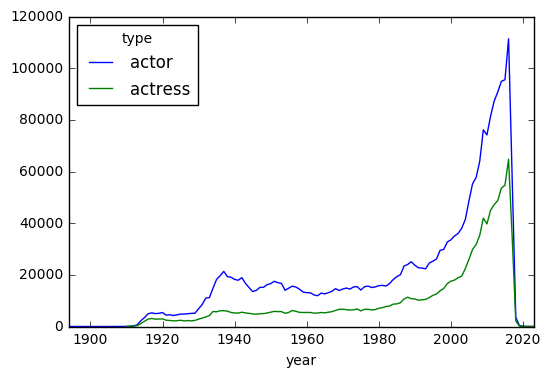

In [76]:
c = cast
g = c.groupby(['type', 'year']).size()
g = g.unstack('type')
#g
g.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

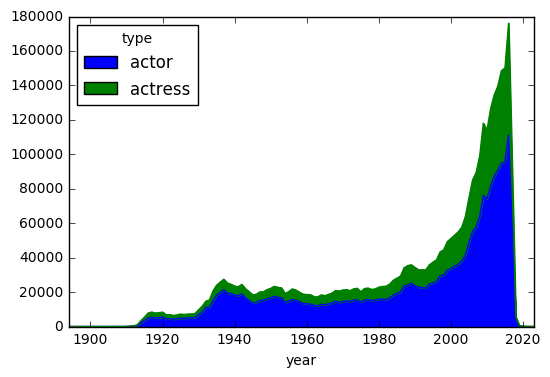

In [38]:
c = cast
g = c.groupby(['type', 'year']).size()
g.unstack(0).plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

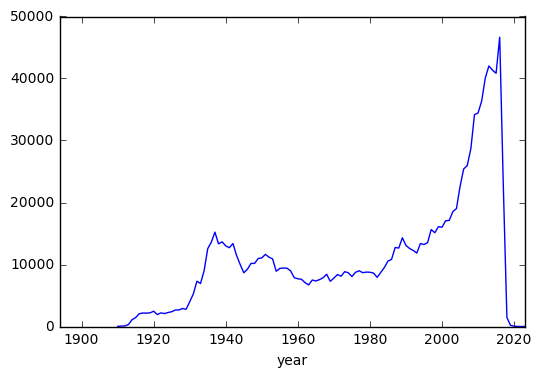

In [46]:
c = cast
g = c.groupby(['type', 'year']).size()
g = g.unstack(0) # or g.unstack('type') is the same
(g['actor'] - g['actress']).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

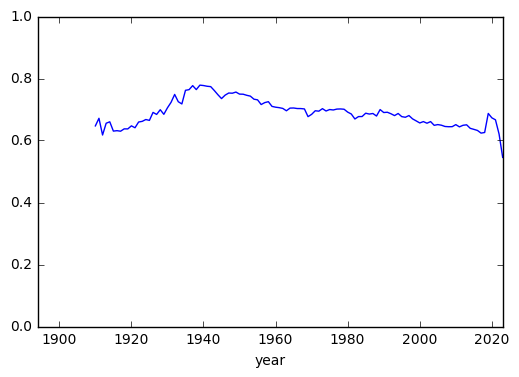

In [60]:
c = cast
g = c.groupby(['type', 'year']).size()
g = g.unstack('type')
g['actor_rate'] = (g['actor'] / (g['actor'] + g['actress']))
g.actor_rate
g['actor_rate'].plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

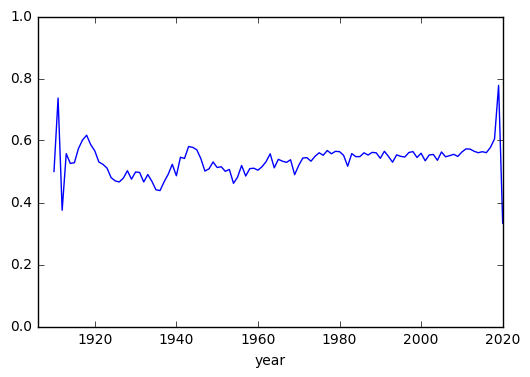

In [63]:
c = cast
c = c[c.n == 2]
g = c.groupby(['type', 'year']).size()
g = g.unstack('type')
(g.actor / (g.actor + g.actress)).plot(ylim = [0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

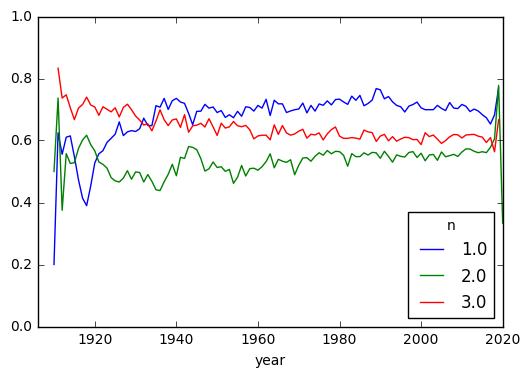

In [73]:
c = cast
c = c[(c.n >= 1) & (c.n <= 3)]
g = c.groupby(['n', 'type', 'year']).size()
g = g.unstack('type')
r = (g.actor / (g.actor + g.actress))
r = r.unstack('n')
r.plot(ylim = [0,1])